(2421, 1611, 3)


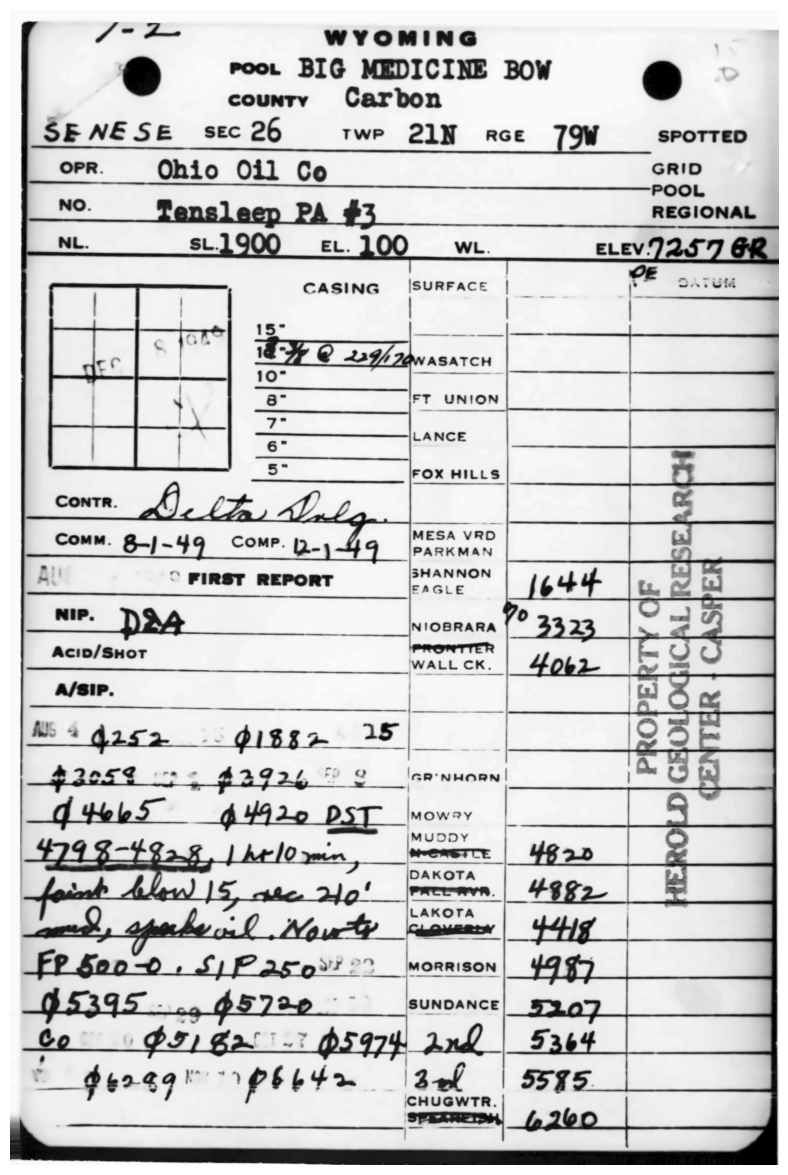

In [8]:
import cv2
import numpy as np
import os
from deskew import determine_skew
import matplotlib.pyplot as plt

rotateDirPath = '/project/arcc-students/csloan5/OilWellCards_project/\
OilWellData/rotated_cards/'
outputDir = '/project/arcc-students/csloan5/OilWellCards_project/OilWellData/\
test_processing/'

#tempPath = '/project/arcc-students/csloan5/OilWellCards_project/Screenshot from 2023-06-06 09-41-10.png'

"""
 This function grayscales the input image, then finds
 the skew angle using the deskew package, then uses 
 the angle to deskew the image, returning a rotated
 version of the image
 Some of this code was found on:
 https://pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/
"""

def deskewImage(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale
    angle = determine_skew(gray) # Find skew angle
    
    # Find center of image
    (h, w) = image.shape[:2] 
    center = (w // 2, h // 2)
    
    # Rotate the image
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed = cv2.warpAffine(image, M, (w, h),
        flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return deskewed


img = cv2.imread(rotateDirPath + 'Eori_card_4c_rotated.jpg') # Read in image
assert img is not None # Make sure that image was read in correctly
print(img.shape)


# Normalizing the image first
norm = cv2.normalize(img, None, 0, 200, cv2.NORM_MINMAX)

# Deskew the image
deskewed = deskewImage(norm)

# Remove noise from the image
denoised = cv2.fastNlMeansDenoisingColored(deskewed, None, 10, 10, 7, 15)

"""
 Thinning and Skeletonization - This seemed to remove too much handwritten text
"""
# kernel = np.ones((2,2),np.uint8)
# erosion = cv2.erode(denoised, kernel, iterations = 1)

# Convert image to grayscale
gray = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)
  
# showing image
plt.figure(figsize=(15,15))
plt.imshow(gray, cmap='gray')
plt.axis('off')

# Show the figure
plt.show()


# Write the processed image
#cv2.imwrite(outputDir + 'Eori_card_4a_Gray.jpg', gray)

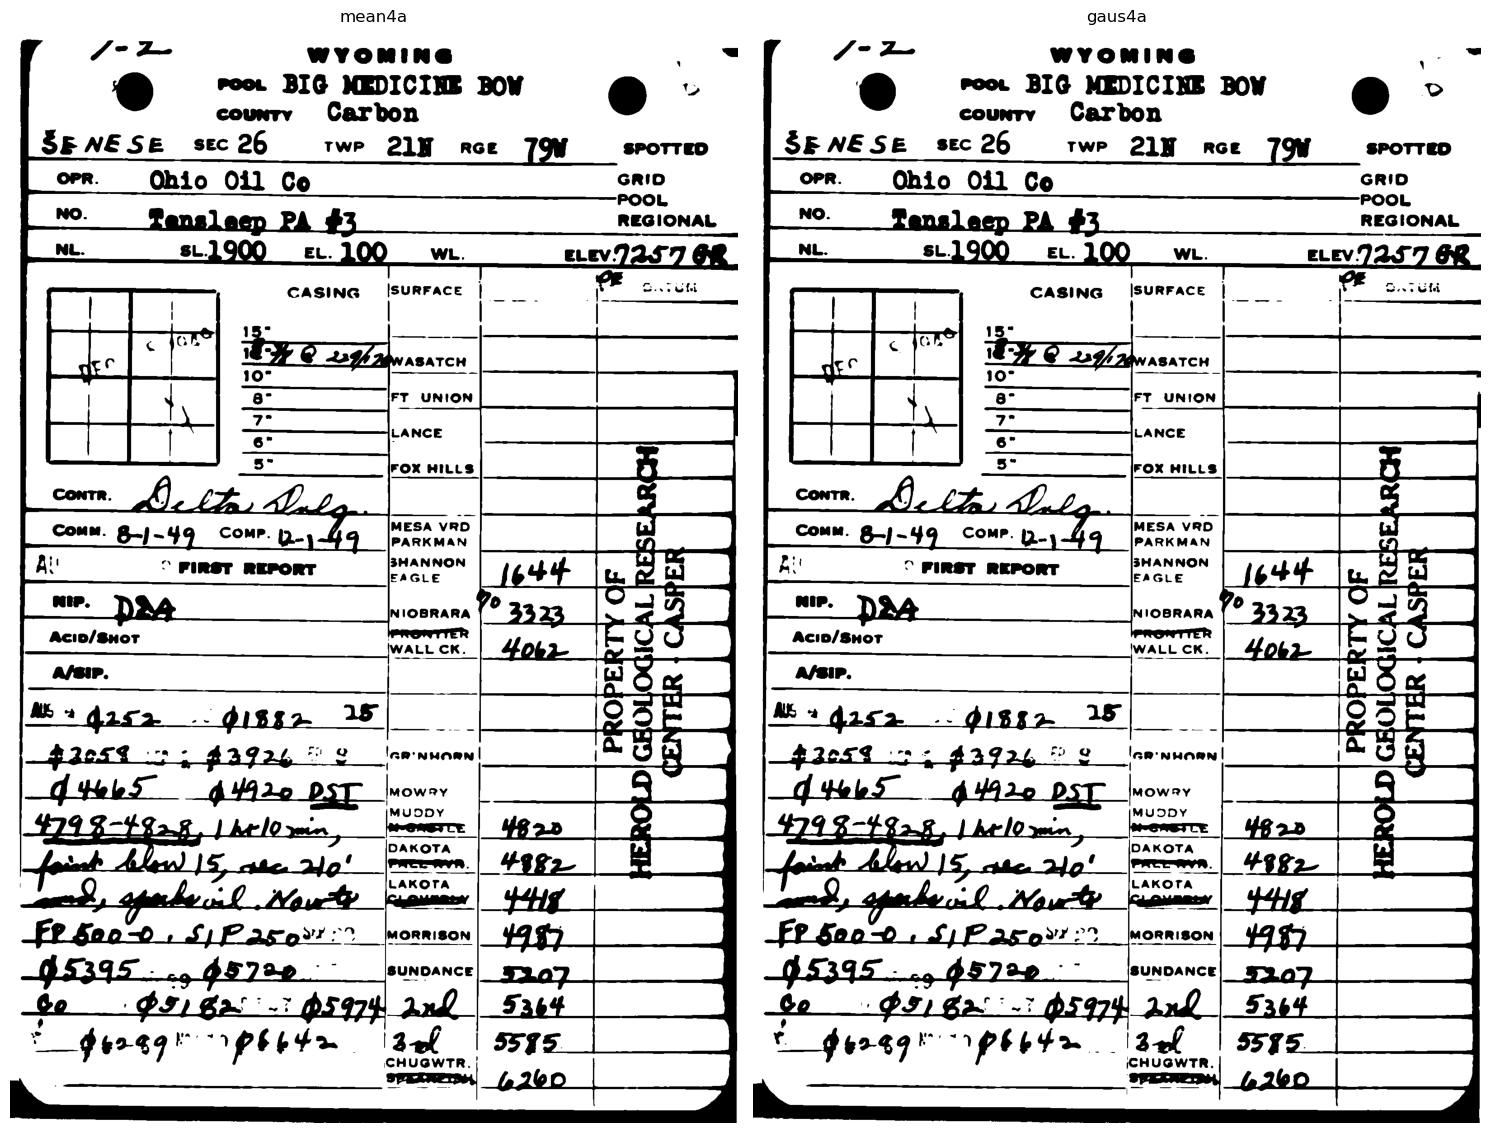

" \nOtsu Thresholding; Didn't seem to work well either\n"

In [9]:
"""
 Below are the many ways that I attempted thresholding the images. 
 Some ways were more effective than others

 Mean adaptive thresholding; Similar results to Gaussian adaptive
 thresholding but Gaussian seemed just slightly better in most tests.
"""
mean = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, \
                              cv2.THRESH_BINARY, 301, 22)

"""
 Gaussian adaptive thresholding; Seems to be the best choice for these
 images. I played around with the blockSize (5th arg) and constant 
 (6th arg) values, and found 101 and 30 to work pretty well.
"""
gaus = cv2.adaptiveThreshold(gray, 255, \
             cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 301, 22)

# Show the figures
fig = plt.figure(figsize=(15, 15))

fig.add_subplot(1, 2, 1)
  
# showing image
plt.imshow(mean, cmap='gray')
plt.axis('off')
plt.title("mean4a")
  
# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
  
# showing image
plt.imshow(gaus, cmap='gray')
plt.axis('off')
plt.title("gaus4a")

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


"""
Binary thresholding; resulting images were not great
Tried playing with different parameter values, nothing really helped
"""
#_,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)


""" 
Otsu Thresholding; Didn't seem to work well either
"""
# _,otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # Otsu's thresholding after Gaussian filtering
# blur = cv2.GaussianBlur(gray,(5,5),0)
# _,otsuGaus = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)